# Cointegration Test and Hedge Ratio Calculation

In this study, we will perform the following tasks:

1. **Calculate the Hedge Ratio**: Perform an Ordinary Least Squares (OLS) regression to estimate the hedge ratio.
2. **Test for Cointegration**: Use the Augmented Dickey-Fuller (ADF) test to determine if the residuals from the hedge ratio calculation are stationary.

Let's start by importing the necessary libraries.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


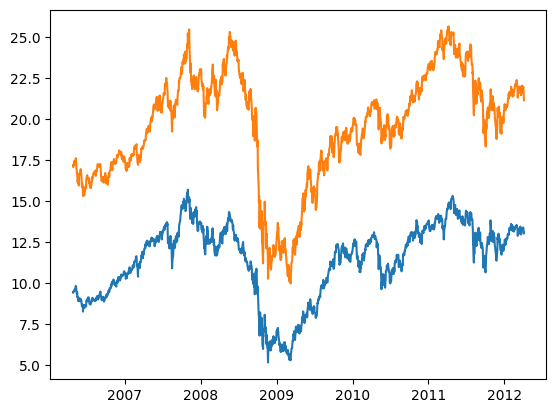

In [18]:
# We will use example data for EWA and EWC price series.

data1 = yf.download("EWA",start="2006-04-26",end="2012-04-09")["Adj Close"]
data2 = yf.download("EWC",start="2006-04-26",end="2012-04-09")["Adj Close"]
plt.plot(data1)
plt.plot(data2)

## Calculating the Hedge Ratio

To estimate the hedge ratio, we perform an OLS regression with EWA as the independent variable and EWC as the dependent variable.


In [19]:
x =(data1.values)
y =(data2.values)

# Add a constant (intercept) term to the features
X = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the hedge ratio (coefficient of x)
hedge_ratio = results.params[1]
print(f"Hedge Ratio: {hedge_ratio}")


Hedge Ratio: 1.433540076026423


## Testing for Cointegration

We will use the Augmented Dickey-Fuller (ADF) test on the residuals to check if they are stationary. The ADF test helps us to determine if the price series are cointegrated.


ADF Statistic: -3.6440019275533126
P-Value: 0.00497343129408452
Number of Lags: 1
Number of Observations Used: 1497
Critical Values: {'1%': -3.434725783926551, '5%': -2.863472629385615, '10%': -2.567798908763865}


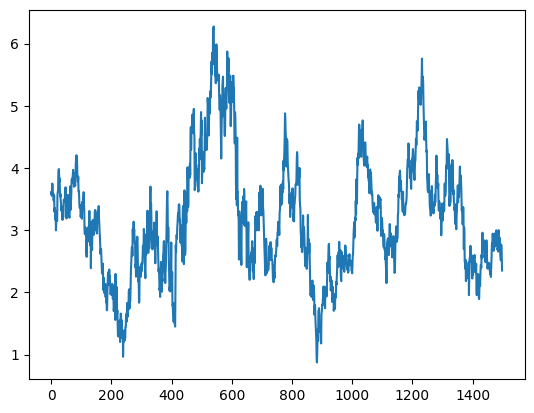

In [20]:
# Calculate the residuals
residuals = y - hedge_ratio * x
plt.plot(residuals)
# Perform the ADF test on the residuals
adf_result = adfuller(residuals, maxlag=1, regression='c')  # 'c' for constant term (intercept)

# Print ADF test results
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")
print(f"Number of Lags: {adf_result[2]}")
print(f"Number of Observations Used: {adf_result[3]}")
print(f"Critical Values: {adf_result[4]}")


## Conclusion

The ADF test statistic, p-value, and critical values will help us determine if the residuals are stationary and thus if the price series EWA and EWC are cointegrated. 

- **ADF Statistic**: Indicates the test statistic value.
- **P-Value**: The probability value associated with the test statistic.
- **Critical Values**: Values to compare against the test statistic for various confidence levels.

If the ADF statistic is more negative than the critical value at a certain confidence level (e.g., 5%), then we can reject the null hypothesis of non-stationarity, indicating that the series are cointegrated.
